In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os


In [ ]:
def score(DATE, PERSON):
  result= pd.read_csv(os.path.join('/content/drive/MyDrive/Colab Notebooks/선거/koelectra results', DATE + PERSON +'.tsv'),header= None, delimiter= ',')
  result=result.transpose()
  df= pd.read_csv(os.path.join('/content/drive/MyDrive/Colab Notebooks/선거/old', DATE + PERSON +'.tsv'), delimiter= '\t')
  df['label']=result
  df['label']= df['label'].apply(lambda x: x if x==1 else -1)
  #define scores
  df['score']= ((df['viewcount']+df['commentcount']*10+df['likecount']*5))*df['label']

  return df


In [ ]:
DATE= ['1223','1224']

for date in DATE:
  yoon= score(date, '윤석열')
  lee= score(date,'이재명')     
  ahn= score(date,'안철수') 
  if date== DATE[0]:
    score_yoon=yoon
    score_lee= lee
    score_ahn= ahn
  else:
    score_yoon= pd.concat([score_yoon, yoon])
    score_lee= pd.concat([score_lee, lee])
    score_ahn= pd.concat([score_ahn, ahn])
                         
score_yoon= score_yoon.reset_index()
score_lee= score_lee.reset_index()
score_ahn= score_ahn.reset_index()

In [ ]:
score_yoon

,index,ID,title,description,viewcount,likecount,commentcount,label,score
0,0,zm-3Wuv-Oo8,[현장직캠] 이세종 열사 추모에 실패한 윤석열 후보,윤석열 #국민의힘 #이세종열사 윤석열 후보 전북 방문 일정에 포함되어있던 이세종 열...,48260,1748,351,-1,-60510
1,1,iUSX2tJd9ac,이낙연 손 잡은 이재명 '업어주십쇼'...윤석열 '장제원이 윤핵관이 되겠나?' / ...,"00:00 오프닝 00:20 김종인 강하게 그립...시동? 08:05 윤석열, AI...",28886,486,61,1,31926
2,2,v79ZAadSX7M,"'민주화운동, 수입된 이념 사로잡혀'…윤석열, 연이틀 논란 / JTBC 뉴스룸",어제(22일)부터 호남에 머물고 있는 윤석열 후보는 연이틀 발언을 놓고 논란입니다....,24216,657,486,-1,-32361
3,3,gCqvqky2VuQ,[백브리핑] 윤석열 &#39;미래 일자리앱&#39; 발언에…'시간여행자냐' / JT...,첫 번째 브리핑 시간여행자? 입니다. 대학생들과 만남을 가진 윤석열 국민의힘 대선후...,157327,4047,2003,-1,-197592
4,4,mBL3XmJAmvo,이준석 &#39;장제원 저격&#39;하자…윤석열 '출근도 안 하는 사람' / JTB...,"국민의힘은 김종인 총괄선대위원장이 당내 갈등 수습에 나섰지만, 이준석 대표는 윤석열...",97952,1129,810,-1,-111697
...,...,...,...,...,...,...,...,...,...
94,45,QeK9HguhQBA,2021년 12월 24일 (금) [아침&amp;매일경제] 다시보기 - 신문브리핑 1...,"신문브리핑 1 ""이준석·장모·부인 그리고 본인의 입…사면초가 놓인 윤석열"" 외 주요...",566,9,2,1,631
95,46,CIdigzJRdgg,윤석열 '민주화 운동 수입 발언이 망언이라고? 바로 설명 들어간다' #SHORTS,"윤석열 #국민의힘 #민주화운동 윤석열 ""민주화 운동 수입 발언이 망언이라고? 바로 ...",695,127,11,-1,-1440
96,47,V1URNL-n8JM,윤석열은 자유를 논하지 말라,윤석열 일가 부정부패 국민검증 특별위원회는 윤석열 일가의 부정부패에 대한 검증을 하...,729,478,32,-1,-3439
97,48,MBUeK2vb4fo,"(사면 긴급1)박근혜 전 대통령 특별사면 단행!윤석열,방금 특별입장문!한명숙 복권!...",제 방송은 무료로 제공되고 있습니다. 여러분들의 구독과 좋아요를 당부드립니다. 감사...,26927,5459,208,1,56302


In [ ]:
######################################################################

In [ ]:
yoon_rolled=[]
storage= 0
roll=25

for i in range(len(score_yoon['score'])):
  storage+= score_yoon['score'][i]
  if i%roll==0:
    yoon_rolled.append(storage)
    storage=0

lee_rolled=[]
storage= 0
for i in range(len(score_lee['score'])):
  storage+= score_lee['score'][i]
  if i%roll==0:
    lee_rolled.append(storage)
    storage=0

ahn_rolled=[]
storage= 0
for i in range(len(score_ahn['score'])):
  storage+= score_ahn['score'][i]
  if i%roll==0:
    ahn_rolled.append(storage)
    storage=0

print(yoon_rolled)
print(lee_rolled)
print(ahn_rolled)

[-60510, -571355, -359184, 248007, 636602]
[48656, 526006, 390215, -329259, 1121860]
[75644, 675951, 1301367, 483137, 3675523]


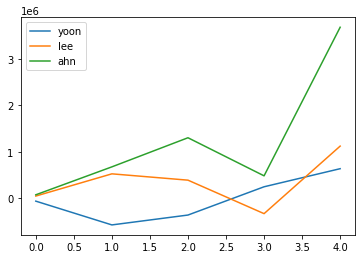

In [ ]:
plt.plot(yoon_rolled, label='yoon')
plt.plot(lee_rolled, label='lee')
plt.plot(ahn_rolled, label='ahn')

plt.legend()
plt.show()